In [3]:
import pandas as pd 
df=pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.drop(columns=['pickup_datetime'],inplace=True)

In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
y=df['dropoff_longitude'].median()
print(y)
df['dropoff_longitude'].fillna(y,inplace=True)

-73.980093


In [7]:
y1=df['dropoff_latitude'].median()
print(y)
df['dropoff_latitude'].fillna(y1,inplace=True)

-73.980093


In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
df[df.duplicated()]

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [11]:
df.rename(columns={'Unnamed: 0': 'passenger_id'}, inplace=True)
df.tail()

,passenger_id,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,49:00.0,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,09:00.0,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,42:00.0,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,56:25.0,14.5,-73.997124,40.725452,-73.983215,40.695416,1
199999,11951496,08:00.0,14.1,-73.984395,40.720077,-73.985508,40.768793,1


In [12]:
df.drop(columns='key',inplace=True)

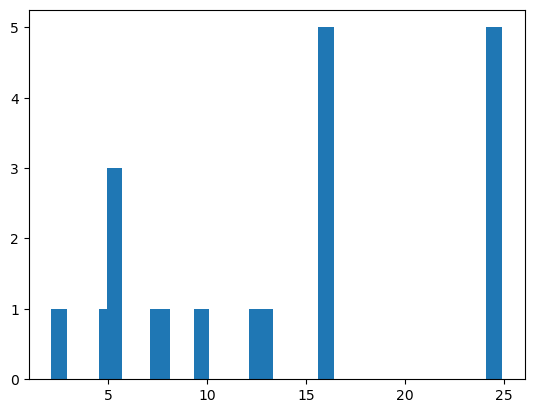

In [13]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
a=df['fare_amount'].iloc[0:10]
b=df['passenger_count'].iloc[0:10]
ax.bar(a,b)
plt.show()

In [14]:
target = df.iloc[:, 2]
dataset_col = df.columns[3:6][df.iloc[:, 3:6].ne(df.iloc[:, 1], axis=0).any()]
dataset = df[dataset_col]
dataset

,pickup_latitude,dropoff_longitude,dropoff_latitude
0,40.738354,-73.999512,40.723217
1,40.728225,-73.994710,40.750325
2,40.740770,-73.962565,40.772647
3,40.790844,-73.965316,40.803349
4,40.744085,-73.973082,40.761247
...,...,...,...
199995,40.739367,-73.986525,40.740297
199996,40.736837,-74.006672,40.739620
199997,40.756487,-73.858957,40.692588
199998,40.725452,-73.983215,40.695416


In [15]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(dataset,target,test_size=0.2,random_state=25)
x_train

,pickup_latitude,dropoff_longitude,dropoff_latitude
34562,40.714474,-74.000092,40.730350
194392,40.776483,-73.959955,40.781532
62432,40.740663,-73.998842,40.738339
73441,40.816088,-73.972800,40.793546
58153,40.741441,-73.996207,40.732395
...,...,...,...
130365,40.759443,-73.980305,40.743492
92303,40.701235,-73.996344,40.696180
6618,40.771931,-73.994196,40.735099
90430,40.779840,-73.967587,40.793848


In [16]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [17]:
reg_pred=regression.predict(x_test)
reg_pred

array([-73.80770778, -73.79580601, -73.73385518, ..., -73.81635344,
       -73.77644413, -11.14914519])

In [18]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score

0.9034323096153918

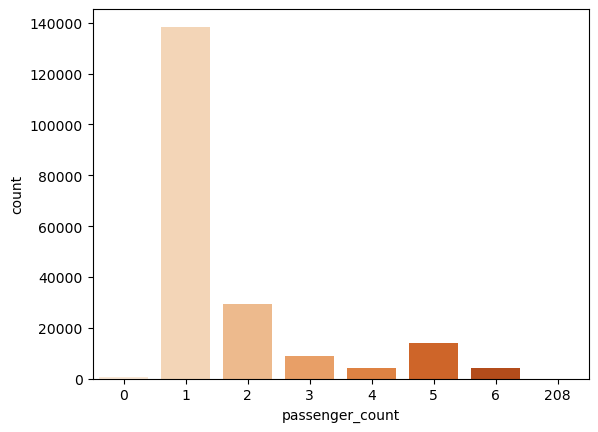

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.countplot(x='passenger_count',data=df,palette="Oranges")
plt.show()